#### Arquivo .ipynb do processo de visualização dos KPIs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

######Configuração do estilo dos gráficos, aqui é comando especifico para o Matplotlib e seaborn.

In [2]:
sns.set_theme(style="white")
plt.rcParams['font.family'] = 'sans-serif'

#####Começo do processo:

In [3]:
print(">>> PASSO 1: FAÇA O UPLOAD DO ARQUIVO 'baseBICNH_dashboard_2025_fase2.csv' <<<")
uploaded = files.upload()

>>> PASSO 1: FAÇA O UPLOAD DO ARQUIVO 'baseBICNH_dashboard_2025_fase2.csv' <<<


Saving baseBICNH_dashboard_2025_fase2 (1).csv to baseBICNH_dashboard_2025_fase2 (1).csv


#####Carregamento e leitura:

In [4]:
# Pega o nome do arquivo que você acabou de subir (mesmo se tiver (1) no final)
nome_arquivo = list(uploaded.keys())[0]
print(f"Lendo arquivo: {nome_arquivo}...")

# Carrega o DataFrame
df = pd.read_csv(io.BytesIO(uploaded[nome_arquivo]))

print(f"Sucesso! Base carregada com {len(df)} linhas.")
df.head()

Lendo arquivo: baseBICNH_dashboard_2025_fase2 (1).csv...
Sucesso! Base carregada com 13401 linhas.


,Cidade,Faixa_Etaria,Genero,KPI_Volume_Demanda,KPI_Taxa_Conversao,KPI_Score_Propensao
0,ADAMANTINA,101-120 ANOS,MASCULINO,0.0,0.0000,0.0000
1,ADAMANTINA,18-21 ANOS,FEMININO,342.0,0.7991,0.8174
2,ADAMANTINA,18-21 ANOS,MASCULINO,443.0,0.8896,0.8730
3,ADAMANTINA,22-25 ANOS,FEMININO,288.0,0.4932,0.5224
4,ADAMANTINA,22-25 ANOS,MASCULINO,318.0,0.5222,0.5073


#####Análise de Volume (Top 10 Cidades)


TABELA 1: TOP 10 CIDADES (VOLUME DE DEMANDA)
Cidade
SAO PAULO                1385521.0
GUARULHOS                 182449.0
CAMPINAS                  117318.0
OSASCO                    103342.0
SOROCABA                   79273.0
SANTO ANDRE                77269.0
SAO BERNARDO DO CAMPO      76652.0
SAO JOSE DOS CAMPOS        69248.0
DIADEMA                    64843.0
CARAPICUIBA                62847.0



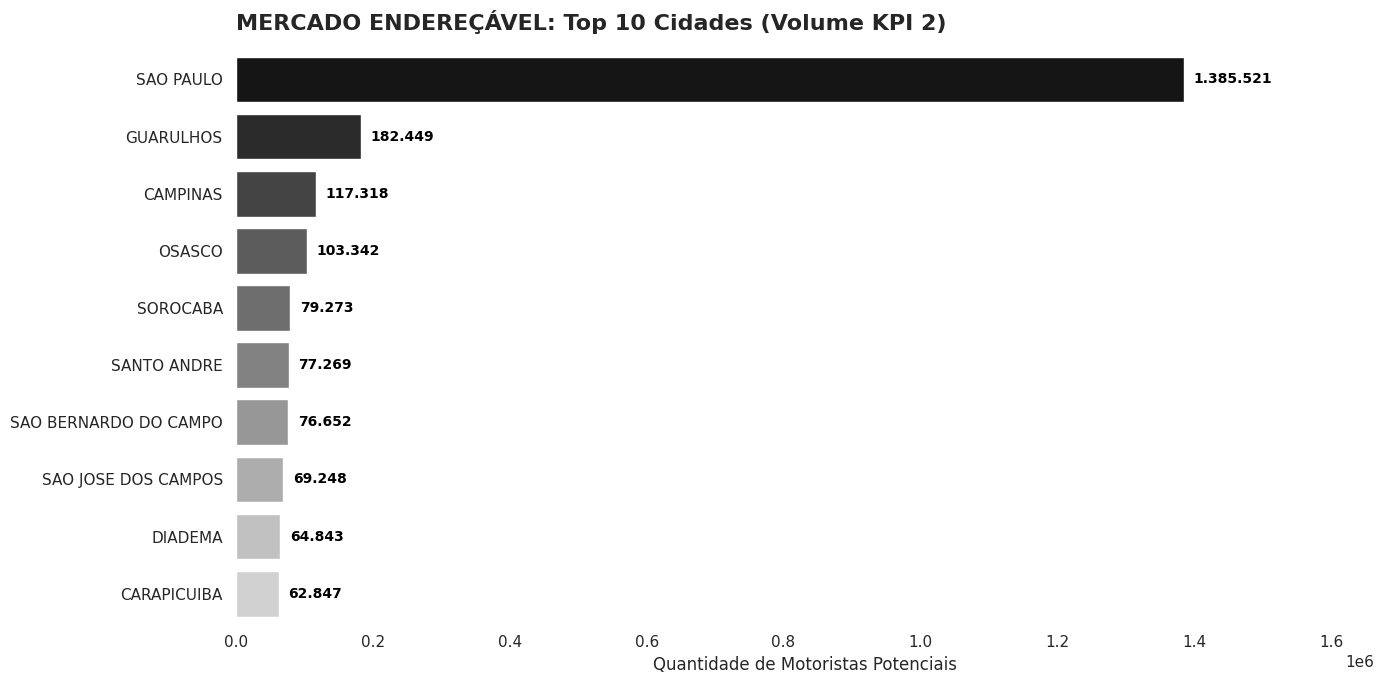

In [8]:
# 1. Processamento
top_cidades = df.groupby('Cidade')['KPI_Volume_Demanda'].sum().sort_values(ascending=False).head(10)

# 2. Imprimir Tabela
print("\n" + "="*60)
print("TABELA 1: TOP 10 CIDADES (VOLUME DE DEMANDA)")
print("="*60)
print(top_cidades.to_string())
print("="*60 + "\n")

# 3. Gerar Gráfico
plt.figure(figsize=(14, 7)) # Aumentei um pouco a largura
paleta_uber = sns.color_palette("Greys_r", 13)[:10]

ax1 = sns.barplot(
    x=top_cidades.values,
    y=top_cidades.index,
    hue=top_cidades.index,
    palette=paleta_uber,
    legend=False
)

plt.title('MERCADO ENDEREÇÁVEL: Top 10 Cidades (Volume KPI 2)', fontsize=16, fontweight='bold', loc='left', pad=15)
plt.xlabel('Quantidade de Motoristas Potenciais', fontsize=12)
plt.ylabel('')

for i, valor in enumerate(top_cidades.values):
    # Formata o número (ex: 1.385.521)
    texto = f"{int(valor):,}".replace(",", ".")

    # Escreve o texto um pouco à frente da barra
    ax1.text(
        valor + (top_cidades.max() * 0.01), # Posição X (valor + 1% de margem)
        i,                                  # Posição Y (linha da barra)
        texto,                              # O número escrito
        va='center',                        # Alinhamento vertical
        fontweight='bold',
        color='black',
        fontsize=10
    )

# Aumenta o limite lateral do gráfico em 20%(São Paulo tem o volume muito alto, tive que mudar isso pra os outros aparecerem)
plt.xlim(0, top_cidades.max() * 1.2)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [15]:
# 1. Soma Total do Estado (Todas as cidades)
total_estado = df['KPI_Volume_Demanda'].sum()

# 2. Soma das Top 10
total_top10 = top_cidades.sum()

# 3. Cálculo da Porcentagem
representatividade = (total_top10 / total_estado) * 100

print(f"Total de Motoristas no Estado (Amostra): {total_estado:,.0f}")
print(f"Total nas Top 10 Cidades: {total_top10:,.0f}")
print("="*50)
print(f"CONCLUSÃO MATEMÁTICA: As Top 10 cidades concentram {representatividade:.1f}% da frota ativa.")
print("="*50)

Total de Motoristas no Estado (Amostra): 4,516,897
Total nas Top 10 Cidades: 2,218,762
CONCLUSÃO MATEMÁTICA: As Top 10 cidades concentram 49.1% da frota ativa.


####KPI 1: Taxa de Adesão(penetração no mercado)


TABELA 3: TAXA DE PENETRAÇÃO (PÚBLICO ALVO ATÉ 70 ANOS)
Genero       FEMININO MASCULINO
Faixa_Etaria                   
18-21 ANOS      70.8%     74.0%
22-25 ANOS      47.6%     47.5%
26-30 ANOS      21.9%     21.9%
31-40 ANOS      11.0%     13.5%
41-50 ANOS       6.5%      8.8%
51-60 ANOS       4.5%      5.4%
61-70 ANOS       2.4%      2.7%



/tmp/ipython-input-2312987859.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(pivot_taxa.applymap(lambda x: f"{x:.1%}").to_string())


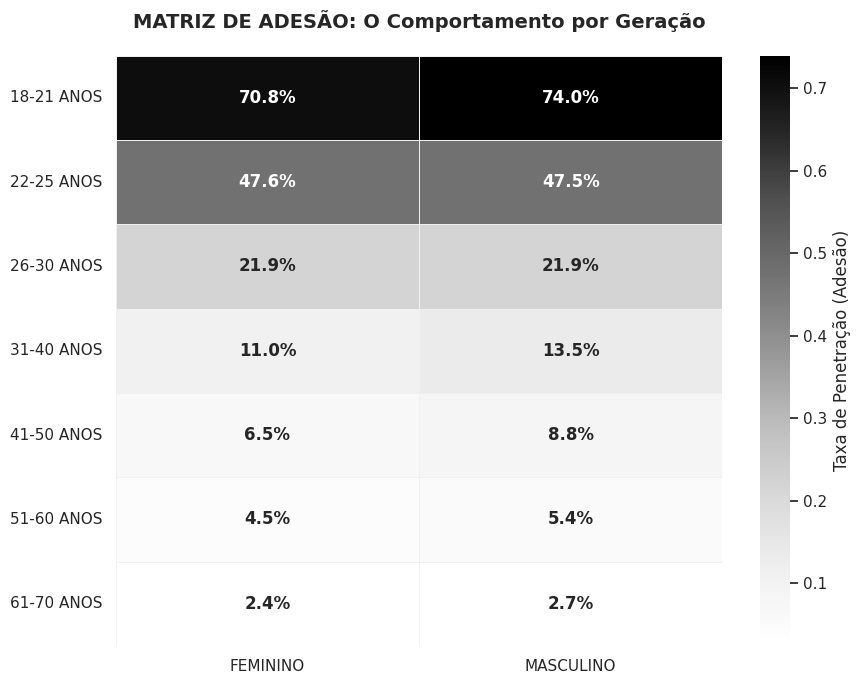

In [10]:
# 1. Filtro de Limpeza (Tirar idades que não são público-alvo)
# Vamos focar no "miolo" do mercado: 18 até 70 anos, a partir disso seguro nenhum vai cobrir.
idades_validas = [
    '18-21 ANOS', '22-25 ANOS', '26-30 ANOS',
    '31-40 ANOS', '41-50 ANOS', '51-60 ANOS', '61-70 ANOS'
]
df_limpo = df[df['Faixa_Etaria'].isin(idades_validas)]

# 2. Processamento
pivot_taxa = df_limpo.pivot_table(index='Faixa_Etaria', columns='Genero', values='KPI_Taxa_Conversao', aggfunc='mean')

# 3. Imprimir Tabela Limpa
print("\n" + "="*60)
print("TABELA 3: TAXA DE PENETRAÇÃO (PÚBLICO ALVO ATÉ 70 ANOS)")
print("="*60)
print(pivot_taxa.applymap(lambda x: f"{x:.1%}").to_string())
print("="*60 + "\n")

# 4. Gerar Gráfico
plt.figure(figsize=(9, 7))

sns.heatmap(
    pivot_taxa,
    annot=True,
    fmt=".1%",
    cmap="Greys",
    cbar_kws={'label': 'Taxa de Penetração (Adesão)'},
    linewidths=.5,
    linecolor='#f0f0f0',
    annot_kws={"size": 12, "weight": "bold"}
)

plt.title('MATRIZ DE ADESÃO: O Comportamento por Geração', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('') # Remove rótulo Genero (já está óbvio)
plt.ylabel('') # Remove rótulo Faixa Etaria

plt.tight_layout()
plt.show()

####KPI 3: Lead Scoring


TABELA KPI 3: PERFIL GERAL DO ESTADO (SCORE 0 a 1)
Genero        FEMININO  MASCULINO
Faixa_Etaria                     
18-21         0.710089   0.740900
22-25         0.476586   0.475062
26-30         0.219860   0.218428
31-40         0.109904   0.134700
41-50         0.065575   0.088293
51-60         0.045194   0.053958
61-70         0.024180   0.027607



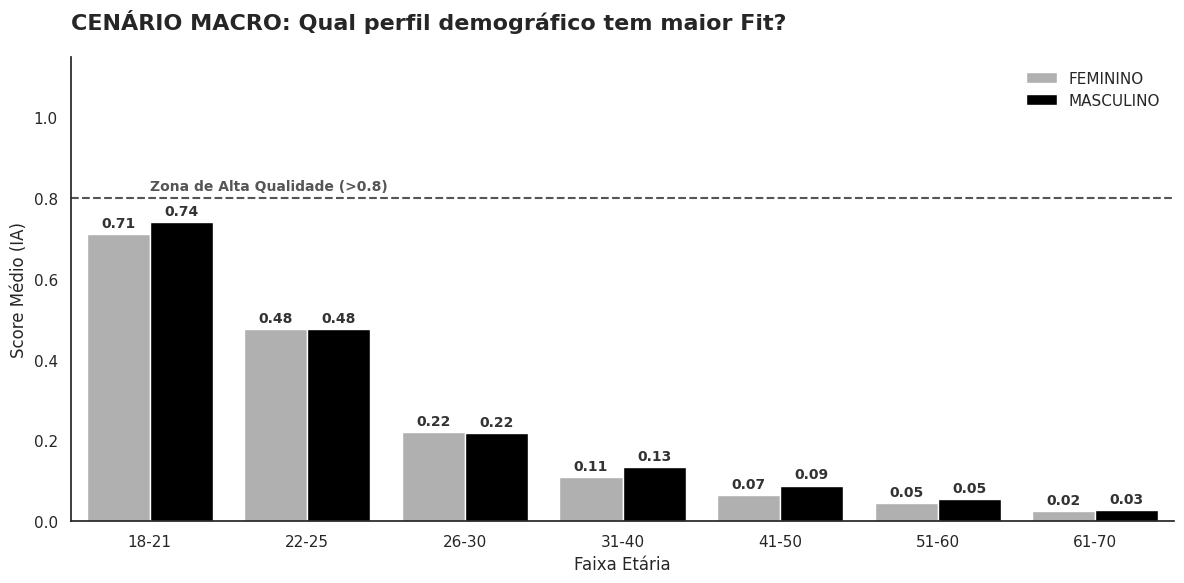

In [14]:
# 1. Filtro de Limpeza (Foco no Business: 18 a 70 anos)
idades_validas = [
    '18-21 ANOS', '22-25 ANOS', '26-30 ANOS',
    '31-40 ANOS', '41-50 ANOS', '51-60 ANOS', '61-70 ANOS'
]
df_limpo = df[df['Faixa_Etaria'].isin(idades_validas)].copy()

# Limpa o texto para o gráfico ficar bonito (Tira o " ANOS")
df_limpo['Faixa_Etaria'] = df_limpo['Faixa_Etaria'].str.replace(' ANOS', '')

# 2. Processamento (Score Médio Geral do Estado)
perfil_score = df_limpo.groupby(['Faixa_Etaria', 'Genero'])['KPI_Score_Propensao'].mean().reset_index()

# 3. Imprimir Tabela
tabela_score = perfil_score.pivot(index='Faixa_Etaria', columns='Genero', values='KPI_Score_Propensao')
print("\n" + "="*60)
print("TABELA KPI 3: PERFIL GERAL DO ESTADO (SCORE 0 a 1)")
print("="*60)
print(tabela_score.to_string())
print("="*60 + "\n")

# 4. Gerar Gráfico
plt.figure(figsize=(12, 6))

# Paleta
paleta_black = {"MASCULINO": "#000000", "FEMININO": "#B0B0B0"}

ax3 = sns.barplot(
    data=perfil_score,
    x='Faixa_Etaria',
    y='KPI_Score_Propensao',
    hue='Genero',
    palette=paleta_black
)

# Linha de Corte
plt.axhline(y=0.8, color='#555555', linestyle='--', linewidth=1.5)
plt.text(0, 0.82, 'Zona de Alta Qualidade (>0.8)', color='#555555', fontsize=10, fontweight='bold')

# Títulos
plt.title('CENÁRIO MACRO: Qual perfil demográfico tem maior Fit?', fontsize=16, fontweight='bold', loc='left', pad=20)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Score Médio (IA)', fontsize=12)
plt.ylim(0, 1.15)
plt.legend(title='', loc='upper right', frameon=False)

# Rótulos
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.2f', padding=3, fontsize=10, fontweight='bold', color='#333333')

sns.despine()
plt.tight_layout()
plt.show()

### Dashboard para filtrar por cidades, podendo analisar perfil por perfil:

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração Visual
sns.set_theme(style="white")

# 1. Preparar a Lista de Cidades
lista_cidades = sorted(df['Cidade'].unique().tolist())

# Lista de idades válidas (Filtro de Negócio: Até 70 anos)
idades_validas = [
    '18-21 ANOS', '22-25 ANOS', '26-30 ANOS',
    '31-40 ANOS', '41-50 ANOS', '51-60 ANOS', '61-70 ANOS'
]

# 2. Função de Atualização
def analisar_cidade(cidade_escolhida):
    plt.close('all') # Limpa memória gráfica

    # A. Filtra a Cidade
    df_local = df[df['Cidade'] == cidade_escolhida].copy()

    if len(df_local) == 0:
        print(f"Sem dados para {cidade_escolhida}")
        return

    # B. Filtra a Idade (Tira +70 e ruídos)
    df_local = df_local[df_local['Faixa_Etaria'].isin(idades_validas)]

    # C. Limpa o Texto (Remove ' ANOS' para não encavalar no gráfico)
    df_local['Faixa_Etaria_Curta'] = df_local['Faixa_Etaria'].str.replace(' ANOS', '')

    # Processamento
    perfil_local = df_local.groupby(['Faixa_Etaria_Curta', 'Genero'])['KPI_Score_Propensao'].mean().reset_index()

    # Exibir Tabela
    tabela_local = perfil_local.pivot(index='Faixa_Etaria_Curta', columns='Genero', values='KPI_Score_Propensao')
    print(f"\nANÁLISE TÁTICA: {cidade_escolhida}")
    print("="*60)
    print("SCORE MÉDIO POR PERFIL (Machine Learning)")
    print("="*60)
    print(tabela_local.to_string())
    print("="*60)

    # Gráfico
    plt.figure(figsize=(12, 6))
    paleta_black = {"MASCULINO": "#000000", "FEMININO": "#B0B0B0"}

    ax = sns.barplot(
        data=perfil_local,
        x='Faixa_Etaria_Curta', # Usa a coluna com texto curto
        y='KPI_Score_Propensao',
        hue='Genero',
        palette=paleta_black
    )

    # Linha de Corte
    plt.axhline(y=0.8, color='#555555', linestyle='--', linewidth=1)
    plt.text(0, 0.82, 'Target Ideal (>0.8)', color='#555555', fontsize=9, fontweight='bold')

    plt.title(f'DIRECIONAMENTO: Perfil Ideal em {cidade_escolhida}',
              fontsize=16, fontweight='bold', loc='left', pad=20)
    plt.xlabel('Faixa Etária', fontsize=12)
    plt.ylabel('Score (Probabilidade ML)', fontsize=12)
    plt.ylim(0, 1.15)
    plt.legend(frameon=False)

    # Rótulos nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=10, fontweight='bold')

    sns.despine()
    plt.show()

# 3. Widget Interativo
dropdown_cidades = widgets.Dropdown(
    options=lista_cidades,
    value='SAO PAULO',
    description='Cidade:',
    disabled=False,
)

widgets.interact(analisar_cidade, cidade_escolhida=dropdown_cidades);

interactive(children=(Dropdown(description='Cidade:', index=564, options=('ADAMANTINA', 'ADOLFO', 'AGUAI', 'AG…